In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
%matplotlib inline
import pylab
from numpy import array, pi
from astropy.io import fits

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from astropy.table import Table
t = Table.read('LOFAR2.fits', format='fits')

In [4]:
print(t)

     Source_Name           Total_flux     ...        z_best      
---------------------- ------------------ ... -------------------
ILTJ104327.95+521032.6 0.5841184590020289 ...              0.6157
ILTJ104330.98+515535.8  2.233776166523432 ...              1.0181
ILTJ104332.52+515259.6 0.9024277866188777 ...              0.5481
ILTJ104333.37+520010.8 0.5899020578887203 ...  0.4662609100341797
ILTJ104341.17+514713.0 0.6132727376440176 ...               0.485
ILTJ104341.64+522025.7  42.75226347356401 ...              0.7929
ILTJ104342.09+521137.2 1.1169500581605294 ... 0.44418030977249146
ILTJ104342.94+514316.7 0.5127128820681194 ...              0.2586
ILTJ104344.59+521703.6 0.3935423232298475 ...              0.5362
ILTJ104345.35+523239.2 2.9488830743857526 ...              0.2335
                   ...                ... ...                 ...
ILTJ152321.22+521306.1 1.6301366464419211 ...   2.094599962234497
ILTJ152324.56+532102.0   3.66562697410943 ...              0.2279
ILTJ152330

In [5]:
hdul = fits.open('LOFAR2.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux

In [6]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [7]:
# Luminosity Distance
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm

In [82]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-20/(1+z))
    return P
Pw22 = array(power(Lum_d,Flux_22,z))
Pw = array(power(Lum_d,flux_tot,z)*(1+z)**(-0.7))

In [83]:
adj = np.where(Pw22>=4e43)
Pw_adj = array((Pw22[adj]))

In [84]:
Pw_adj

array([1.02557631e+45, 5.10909548e+43, 2.25055443e+48, ...,
       1.87238443e+45, 3.67131885e+45, 1.29148785e+44])

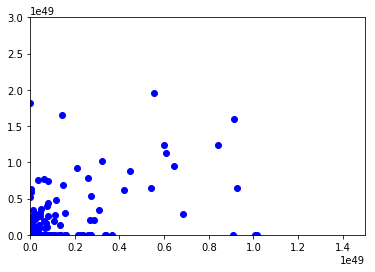

In [111]:
plt.scatter(Pw,Pw22, c= 'b')
plt.xlim(1e37,1.5e49)
plt.ylim(1e37,0.3e50)
plt.show()

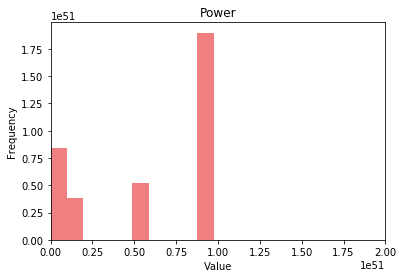

In [22]:
import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api


plt.hist(Pw_adj, weights=Pw_adj , color = "lightcoral")
plt.title("Mid IR Power")
plt.xlabel("Value")
plt.ylabel("Frequency")
rwidth=20
plt.xlim(0,0.2e52)
fig = plt.gcf()

In [24]:
np.amax(Pw_adj, axis=0) # Print max value

9.750199401433609e+50